# **Churn Rate Predictor Using Neural Network**
# **Hasbi Thaufik Oktodila**

# **I. Objectives**

This project is aimed to predict the churn rate of an internet provider company. In this project, there is an insight of the customer's behavior and prediction model using Deep Learning. This model is aimed to help company reduce their churn rate while gain insight on customer's behavior. Happier customer = Less Churn.

# **II. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow as tf
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Dropout
from keras.backend import clear_session
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import chi2_contingency

np.random.seed(50)
tf.random.set_seed(50)
pd.set_option('display.max_columns', None)

import pickle

: 

: 

# **III. Data Loading**

> Data Loading akan dilakukan melalui Kaggle API.

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d blastchar/telco-customer-churn

telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q telco-customer-churn.zip -d dataset

replace dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [ ]:
df= pd.read_csv('/content/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# **IV. Data's Legend**

* **customerID**: Customer ID  
* **Gender**: Whether the customer is a male or a female.
* **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)
* **Partner**: Whether the customer has a partner or not (Yes, No)
* **Dependents**: Whether the customer has dependents or not (Yes, No)
* **tenure**: Number of months the customer has stayed with the company
* **PhoneService**: Whether the customer has a phone service or not (Yes, No)
* **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
* **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)
* **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
* **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)
* **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)
* **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
* **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)
* **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
* **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)
* **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges**: The amount charged to the customer monthly
* **TotalCharges**: The total amount charged to the customer
* **Churn**: Whether the customer churned or not (Yes or No)







In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **III. Data Cleaning**

Langkah-langkah yang akan dilakukan di tahap ini adalah:
- Mengecek dan menangani Null values
- Mengecek dan menangani duplicates
- Mengecek dan menyesuaikan datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> Mengecek Null Values

In [ ]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

> Tidak ada null, berlanjut ke duplicates.

In [ ]:
df.duplicated().any()

False

> Tidak ada duplicates, berlanjut ke pemeriksaan datatype

> Melakukan pengecekan tipe data bersifat numerikal dan kategorikal berdasarkan unique valuenya:

In [ ]:
for x in df.select_dtypes(include=[object]).columns:
    print(f'Value In {x}: ', df[x].unique(), '\n', 'Total Value:', len(df[x].unique()))
    print('-'*100)

Value In customerID:  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 
 Total Value: 7043
----------------------------------------------------------------------------------------------------
Value In gender:  ['Female' 'Male'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In Partner:  ['Yes' 'No'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In Dependents:  ['No' 'Yes'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In PhoneService:  ['No' 'Yes'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In MultipleLines:  ['No phone service' 'No' 'Yes'] 
 Total Value: 3
--------------------------------------------------------------------------------------

Insight:
> - Kolom total charge memiliki datatype 'object', tapi berisikan data-data numerikal yang jumlahnya sangat banyak. Kolom ini akan dijadikan kolom int/float.
> - Meskipun memiliki datatype 'object', `TotalCharges` bersifat numerik. Kolom ini akan diubah datatypenya menjadi str dan dikategorikan sebagai numerik
> - Hal yang sama juga ditemukan di `customerID`. Hanya saja, `customerID` akan didrop karena merupakan kolom yang tidak relevan untuk prediksi.
> - Data yang memiliki value `No phone service` dan `No internet service` akan dijadikan `No`. Hal ini dikarenakan jika seseorang tidak memiliki phone service dan internet service, maka secara otomatis orang tersebut tidak menggunakan jasa-jasa seperti Streaming Movies, Streaming TV, dan layanan lainnya

In [ ]:
df = df.replace('No phone service','No')
df = df.replace('No internet service','No')
df['MultipleLines'] = df['MultipleLines'].str.replace('No phone service', 'No')


> Melakukan pemastian perubahan terhadap data 'no phone service' dan 'no internet service'

In [ ]:
df[df.apply(lambda row: row.astype(str).str.contains('No phone service', case=False).any(), axis=1)].count()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df[df.apply(lambda row: row.astype(str).str.contains('No internet service', case=True).any(), axis=1)].count()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

> Cleaning kolom `TotalCharges`

In [ ]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

> Saat merubah kolom `TotalCharge`, terdapat kolom dengan value ' '. value ' ' akan dihandle terlebih dahulu, kemudian dijadikan numerik.

In [ ]:
s = df.TotalCharges.str.replace(' ' , '')
df['TotalCharges'] = pd.to_numeric(s)
df.drop(columns='customerID', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


> Saat dilakukan pengecekan, kolom total charge memiliki null value sebanyak (11). Sepertinya, value ' ' tadi merupakan null value dari kolom ini. Karena hanya 11 baris, null value akan didrop.

In [ ]:
# df['TotalCharges'].fillna(0, inplace=True)
# df['TotalCharges'].isnull().sum()

0

In [ ]:
df.dropna(axis=0, inplace=True)
df['TotalCharges'].isnull().sum()

> Selanjutnyam mengecek sifat data numerikal dengan melihat histogramnya.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cc9ede220>,
      dtype=object)

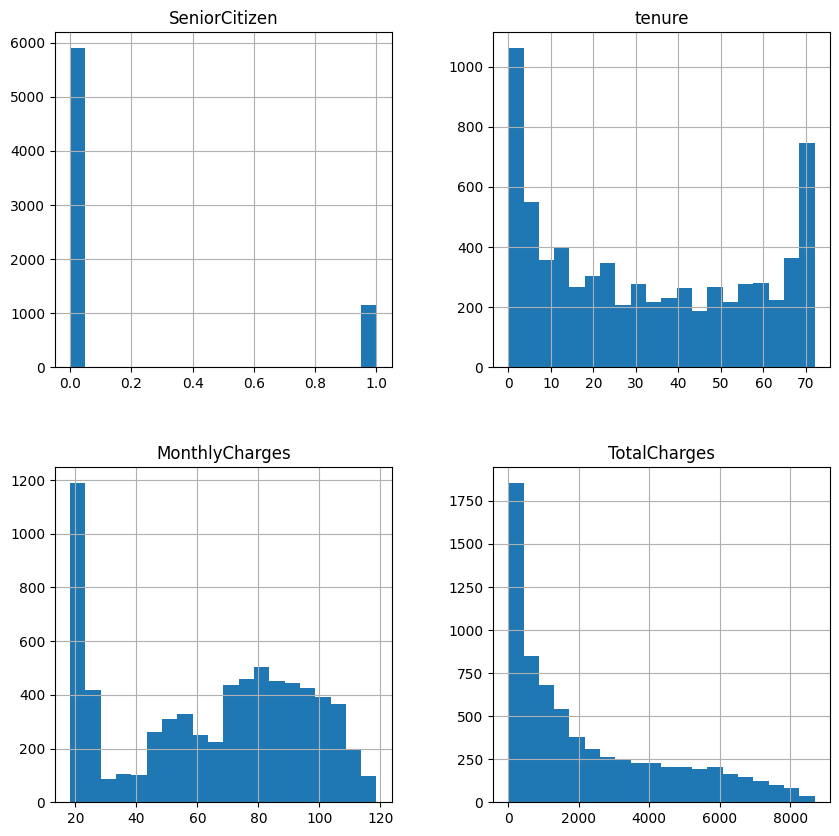

In [ ]:
df.hist(figsize = (10,10), bins=20)

> Dari sini, terlihat SeniorCitizen bersifat kategorikal. Kolom ini akan dijadikan string.

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
df['SeniorCitizen'] = df['SeniorCitizen'].str.replace('1', 'Yes')
df['SeniorCitizen'] = df['SeniorCitizen'].str.replace('0', 'No')


> Kolom Churn akan dijadikan 0 dan 1 (numerik) agar mempermudah saat melakuakan data preprocessing dan feature selection

In [ ]:
df['Churn'] = df['Churn'].str.replace('Yes', '1')
df['Churn'] = df['Churn'].str.replace('No', '0')


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
df['Churn'] = df['Churn'].astype(int)

> Melakukan pengecekan ulang:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


> Data sudah bersih. Proses akan dilanjutkan ke Exploratory Data Analysis

# **V. Exploratory Data Analysis**

Pada Tahap ini akan dilakukan: 
- Pendefinisian data kategorikal dan numerikal.
- Melakukan Bivariate analysis dengan melakukan komparasi feature-feature lain dengan kolom target (Churn)

> Melakukan pemisahan antara kategorikal dan numerikal:

> **Defining categoricals and numericals**

In [ ]:
categoricals = df.select_dtypes(include=[object]).columns
print(categoricals)
print('Total column: ', len(categoricals))

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
Total column:  16


In [ ]:
numericals = df.select_dtypes(include=[np.number]).columns
print(numericals)
print('Total column: ', len(numericals))

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')
Total column:  4


> Setelah kategorikal dan numerikal dipisahkan, proses dilanjutkan ke tahap Bivariate Analysis.

> **Bivariate Analysis**

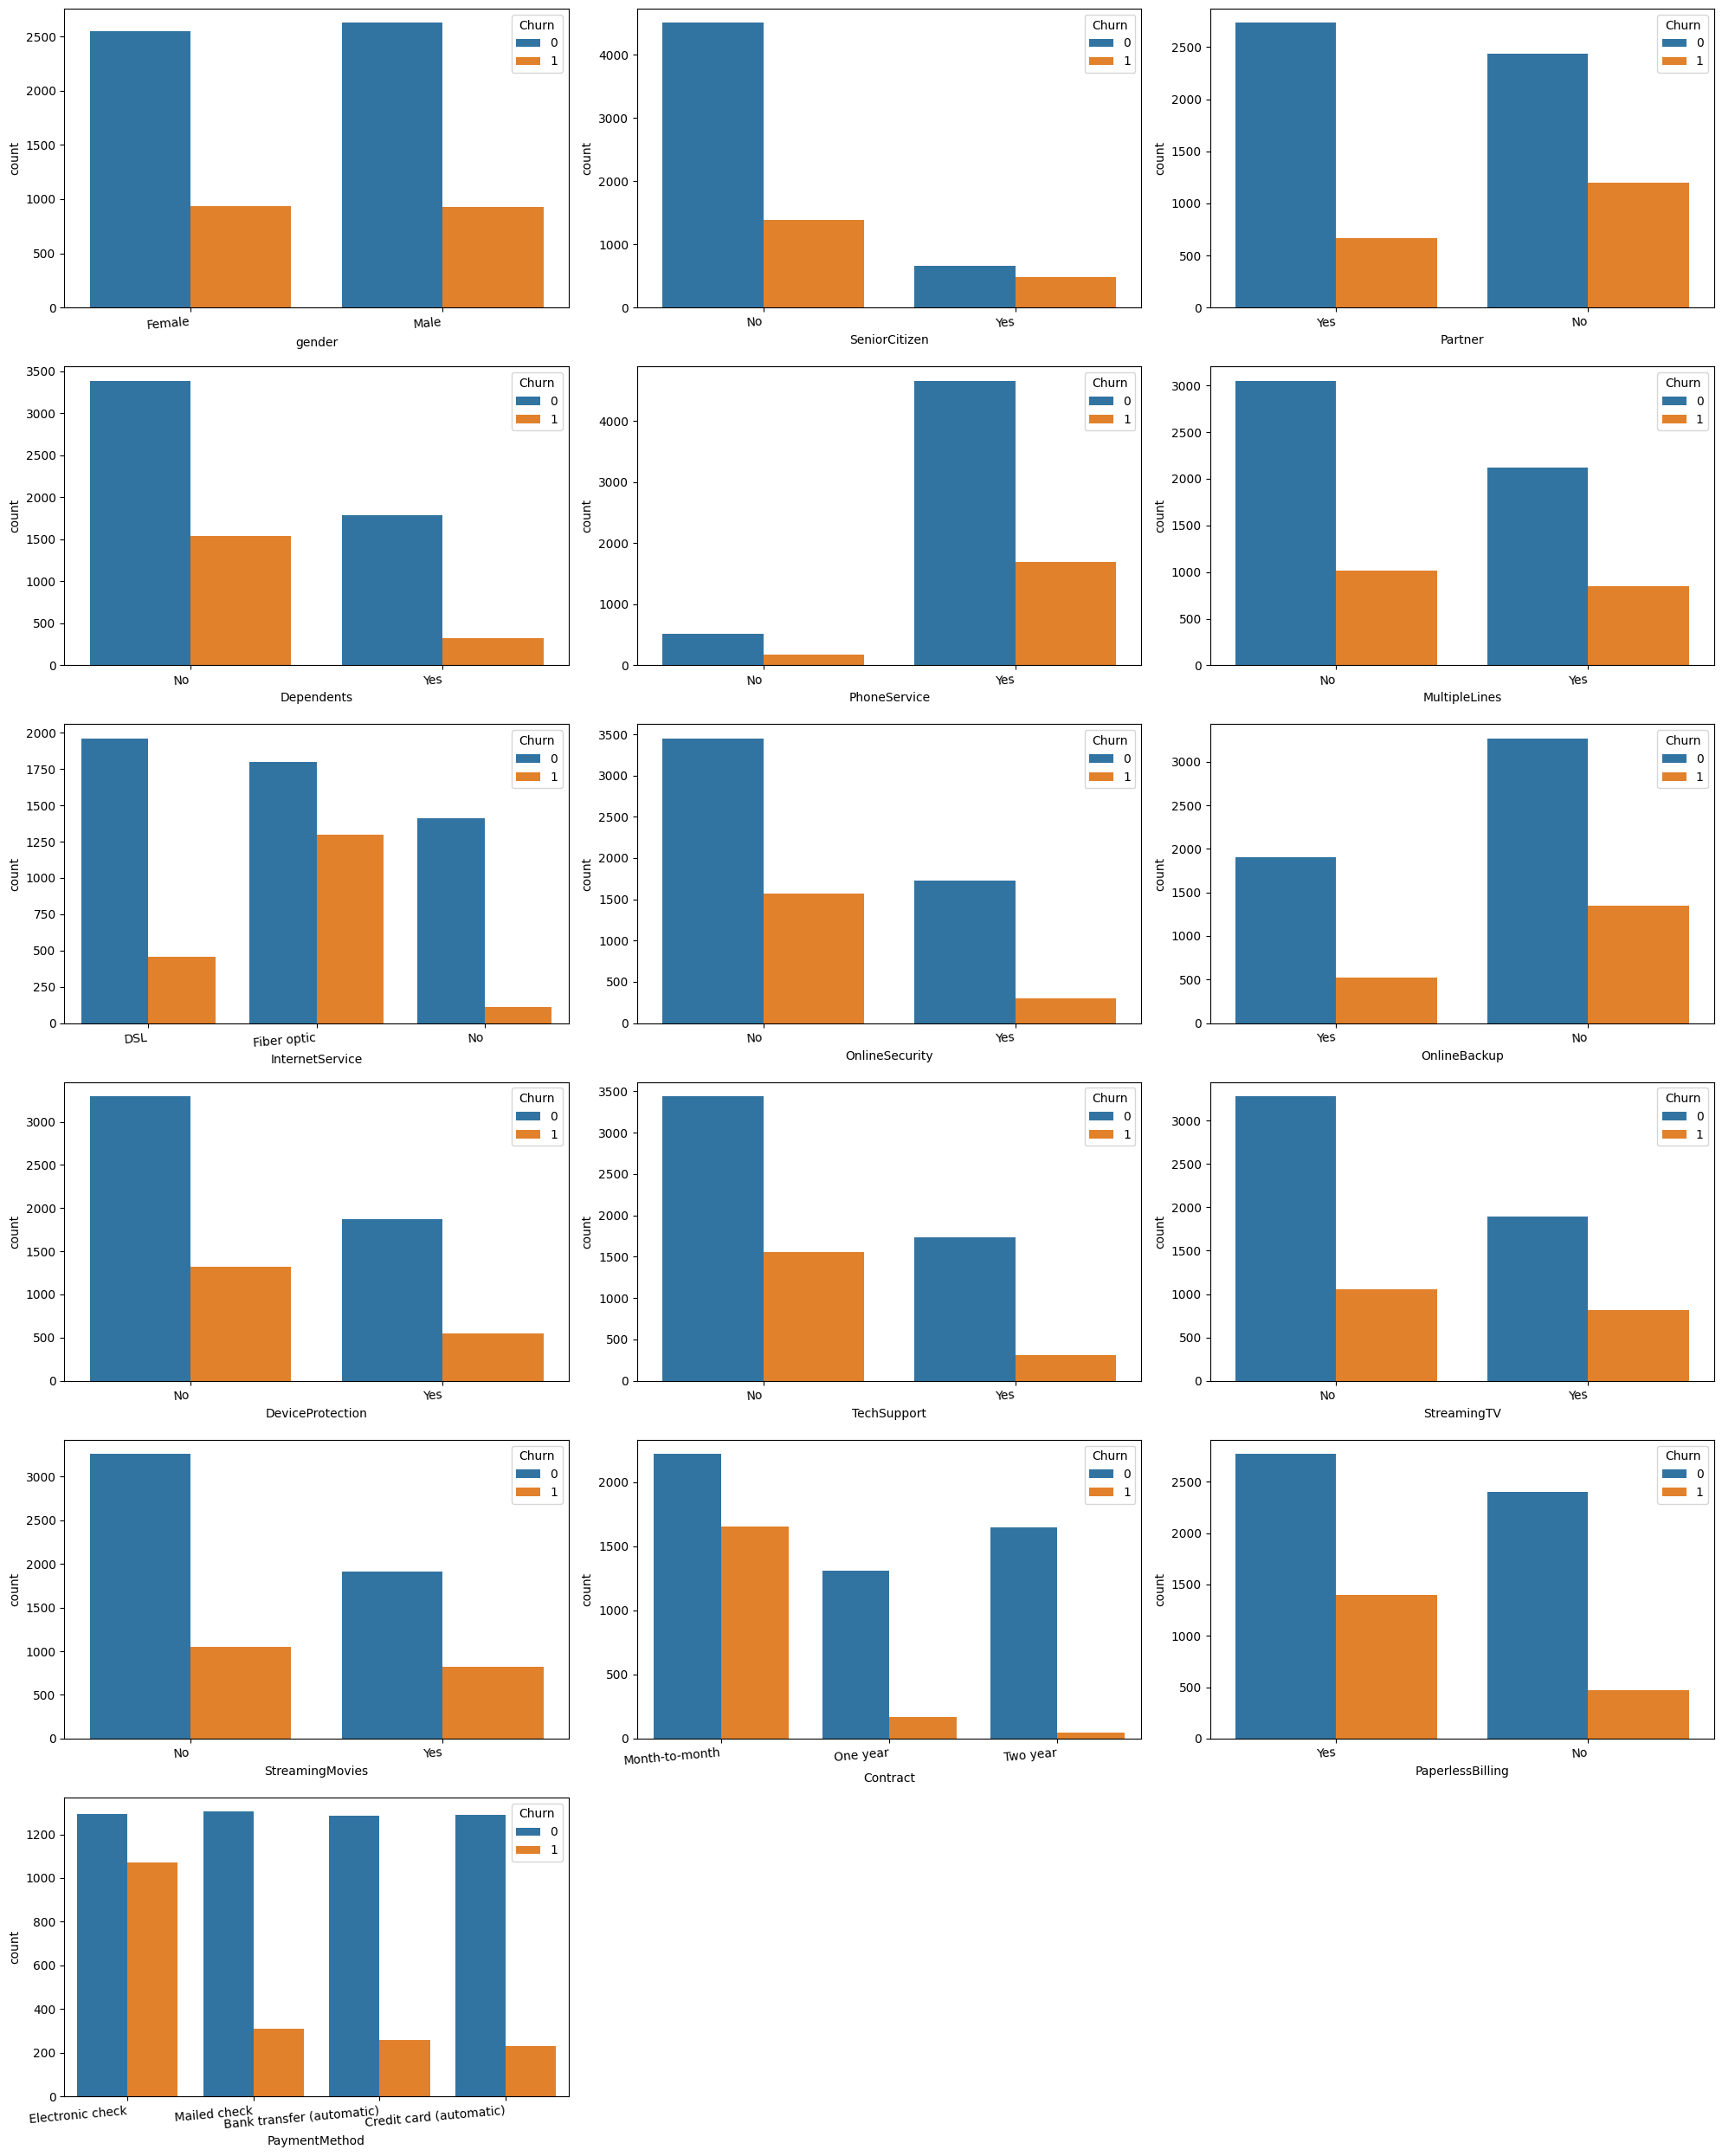

In [ ]:
cols = 3
rows = 6
fig = plt.figure(figsize= (20,25))
all_cat = df[categoricals]
cat_cols = df[categoricals].columns

for i, col in enumerate(cat_cols): 
    ax=fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=df[col], hue=df['Churn'], ax=ax)
    plt.xticks(rotation=5, ha='right')
    
fig.tight_layout()
plt.show()

> Insight:
- Dari kolom `gender`, tingkat Churn sepertinya tidak memiliki pengaruh karena memiliki jumlah Churn yang kurang-lebih sama
- Dari kolom `SeniorCitizen`, Customer yang lebih muda memiliki tingkat Churn yang lebih tinggi.
- Dari kolom `Partner`, Customer yang tidak memiliki partner memiliki tingkat Churn lebih tinggi
- Dari kolom `Dependents`, Customer yang tidak memiliki ketergantungan terhadap cellphone service ini memiliki tingkat Churn yang tinggi.
- Customer yang memiliki `PhoneService` memiliki tingkat Churn lebih tinggi dibandingkan dengan yang tidak
- Customer dengan Internet Service Fiber Optic memiliki tingkat Churn yang lebih tinggi
- Customer tanpa online security memiliki probabilitas Churn yang lebih tinggi
- Customer tanpa online backup memiliki probabilitas Churn yang tinggi
- Customer tanpa Device Protection memiliki probabilitas Churn yang tinggi
- Customer tanpa Tech Support memiliki probabilitas Churn yang tinggi
- Sepertinya, customer yang tidak mementingkan keamanan dalam menggunak phone service ini cenderung memiliki probabilitas Churn yang tinggi. Mereka bisa saja keluar karena kesalahan sendiri, namun hal ini perlu dilakukan pengecekan yang lebih lanjut.
- Customer yang tidak menggunakan fasilitas StreamingTV dan Streaming Movies memiliki probabilitas Churn yang tinggi.
- Customer yang memiliki contract dari bulan ke bulan memiliki tingkat Churn yang tinggi
- Customer yang menggunakan Paperless Billing memiliki probabilitas Churn yang tinggi
- Customer yang melakukan pembayaran dengan Electronic Check memiliki probabilitas Churn yang tinggi dibandingkan dengan metode pembayaran lain.



In [ ]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

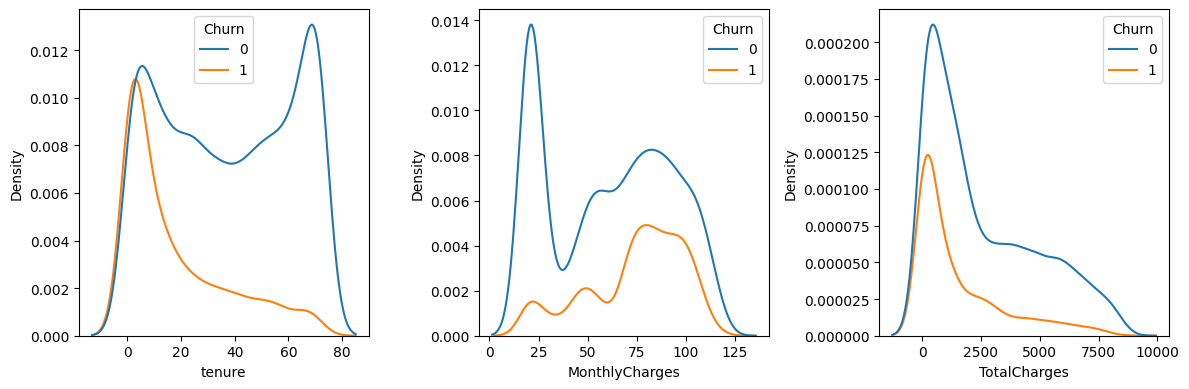

In [ ]:
cols = 3
rows = 1
num_cols = df[['tenure', 'MonthlyCharges', 'TotalCharges']].columns
fig = plt.figure( figsize=(cols*4, rows*4))

for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.kdeplot(x = df[col], hue=df['Churn'], ax = ax)
    
fig.tight_layout()  
plt.show()

> Insight:
- Dari kolom `tenure`, terlihat bahwa dari tenure 0-20 memiliki intensitas churn yang tinggi.
- Sementara itu, dari kolom lain, distribusinya tidak terlalu berbeda jauh. Kecuali dari MonthlyCharges, dari 20-25 memiliki probabilitas kesetiaan yang tinggi dan probabilitas Churn yang rendah.

> Tahap selanjutnya yaitu melakukan pengecekan outlier

> Melihat skewness setiap kolom numerik:

In [ ]:
for i in numericals:
  print(f'{i} Skewness: ', df[i].skew())

tenure Skewness:  0.2395397495619829
MonthlyCharges Skewness:  -0.22052443394398033
TotalCharges Skewness:  0.963234654832277
Churn Skewness:  1.063031444575135


> Melihat distribusi kolom numerik:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cca288910>,
      dtype=object)

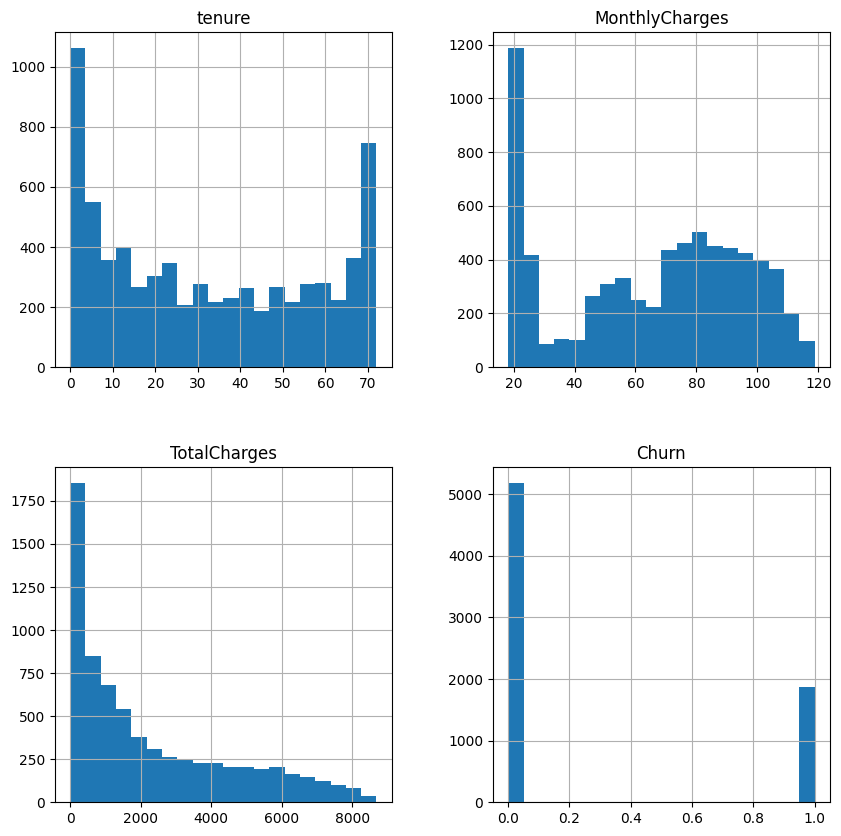

In [ ]:
df.hist(figsize = (10,10), bins=20)

> Melihat boxplot:

tenure skewness :  0.2395397495619829
MonthlyCharges skewness :  -0.22052443394398033
TotalCharges skewness :  0.963234654832277


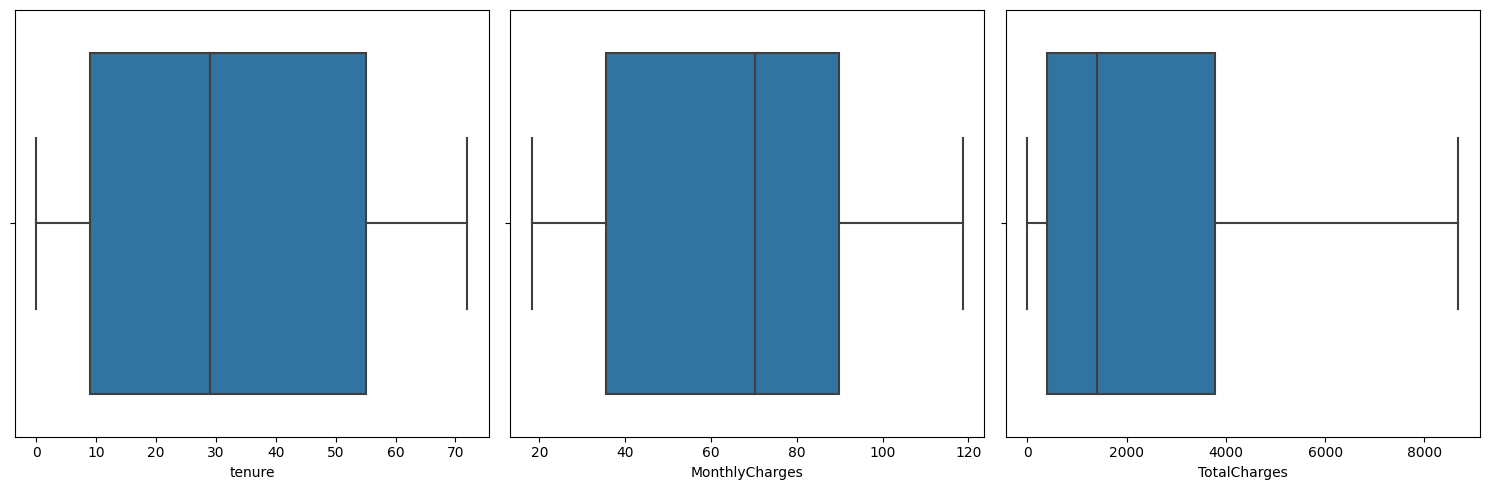

In [ ]:
cols = 3
rows = 1
num_cols = df[['tenure', 'MonthlyCharges', 'TotalCharges']].columns
fig = plt.figure( figsize=(cols*5, rows*5))

for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x = df[col], ax = ax)
    print(f'{col} skewness : ', df[col].skew())
    
fig.tight_layout()  
plt.show()

> Insight:
- Dari tingkat skew, persebaran data relatif normal.
- Dari boxplot, tidak terlihat ada outlier.

> Melakukan pengecekan outlier dengan sistem IQR:

In [ ]:
def outlier_analysis(df,col):
  skewness = df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df[col].mean() + 3*df[col].std()
    lower = df[col].mean() - 3*df[col].std()
  else:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (3 * IQR)
    lower = Q1 - (3 * IQR)

  no_outliers = df[(df[col]>=lower) &  (df[col]<=upper)]
  outliers = df[(df[col]<lower) | (df[col]>upper)]

  return outliers,no_outliers, upper, lower

cols_name = numericals

for i in cols_name:
    out,no_out, up, low = outlier_analysis (df,i)
    print('-'*20)
    print(i)
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', (len(out)/len(df))*100, '%') 

--------------------
tenure
count of outlier:  0
percentage of outlier:  0.0 %
--------------------
MonthlyCharges
count of outlier:  0
percentage of outlier:  0.0 %
--------------------
TotalCharges
count of outlier:  0
percentage of outlier:  0.0 %
--------------------
Churn
count of outlier:  0
percentage of outlier:  0.0 %


> Karena tidak ada outlier, maka proses akan dilanjutkan ke feature selection.

# **VI. Feature Selection**

## **V. I. Splitting**

> Splitting data inference

In [ ]:
df_inf = df.sample(3, random_state=42069)
df = df.drop(df_inf.index)

> Memisahkan Feature dan Target:

In [ ]:
feature1 = df.drop('Churn', axis=1)
target = df['Churn']

In [ ]:
x_train_full, x_test,  y_train_full, y_test = train_test_split(feature1,
                                                               target,
                                                               shuffle=True, test_size=0.2,
                                                               stratify= target
                                                               )

x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)


> Memastikan semua pemisahan memiliki total kolom yang sama

In [ ]:
print('Main Dataframe Shape : ', df.shape)
print('Inference Shape      : ', df_inf.shape)
print('x_train_full Shape   : ', x_train_full.shape)
print('y_train_full Shape   : ', y_train_full.shape)
print('x_train Shape        : ', x_train.shape)
print('y_train Shape        : ', y_train.shape)
print('x_val Shape          : ', x_val.shape)
print('y_val Shape          : ', y_val.shape)
print('x_test Shape         : ', x_test.shape)
print('y_test Shape         : ', y_test.shape)

Main Dataframe Shape :  (7040, 20)
Inference Shape      :  (3, 20)
x_train_full Shape   :  (5632, 19)
y_train_full Shape   :  (5632,)
x_train Shape        :  (4505, 19)
y_train Shape        :  (4505,)
x_val Shape          :  (1127, 19)
y_val Shape          :  (1127,)
x_test Shape         :  (1408, 19)
y_test Shape         :  (1408,)


> Menggabungkan Feature dan Target di data Train untuk melakukan feature selection:

In [ ]:
df_eda = x_train.copy()
df_eda['Churn'] = y_train
df_eda

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6397,Male,Yes,No,No,54,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic),65.25,3529.95,0
4006,Male,No,Yes,Yes,72,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Credit card (automatic),19.80,1414.65,0
6226,Male,No,No,No,65,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,1654.75,0
614,Male,No,No,No,50,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),69.50,3418.20,0
2729,Female,No,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.70,169.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,Male,No,No,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,51.00,354.05,1
6997,Female,No,Yes,No,27,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,76.10,2093.40,0
6744,Male,No,No,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,One year,No,Bank transfer (automatic),101.35,7110.75,0
3069,Female,No,No,No,10,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,20.55,187.35,0


## **V. II. Categorical Feature Selection**

> Melakukan assigning terhadap kolom-kolom kategorikal untuk dilihat Chi Squarenya.

In [ ]:
chi_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']

> Menggunakan Chi-Square score terhadap fitur kategorikal karena target juga kategorikal.

In [ ]:
for col in categoricals:
    contingency_table = pd.crosstab(df_eda[col], df_eda["Churn"])
    stat, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(col)
    print('p=%.3f' % (p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')
    print('-'*20)

gender
p=0.890
Probably independent
--------------------
SeniorCitizen
p=0.000
Probably dependent
--------------------
Partner
p=0.000
Probably dependent
--------------------
Dependents
p=0.000
Probably dependent
--------------------
PhoneService
p=0.356
Probably independent
--------------------
MultipleLines
p=0.013
Probably dependent
--------------------
InternetService
p=0.000
Probably dependent
--------------------
OnlineSecurity
p=0.000
Probably dependent
--------------------
OnlineBackup
p=0.000
Probably dependent
--------------------
DeviceProtection
p=0.000
Probably dependent
--------------------
TechSupport
p=0.000
Probably dependent
--------------------
StreamingTV
p=0.001
Probably dependent
--------------------
StreamingMovies
p=0.001
Probably dependent
--------------------
Contract
p=0.000
Probably dependent
--------------------
PaperlessBilling
p=0.000
Probably dependent
--------------------
PaymentMethod
p=0.000
Probably dependent
--------------------


> Dari hasil skor chi-square, maka kolom yang harus didrop adalah `gender` dan `PhoneService` karena bersifat independent. Selebihnya akan diputuskan sebagai selected feature.

In [ ]:
df_eda.drop(['gender', 'PhoneService'], axis=1, inplace=True)
print(df_eda.columns)
print('Total Column: ', len(df_eda.columns))

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')
Total Column:  18


## **V. III. Numerical Feature Selection**

> Skor korelasi kendall akan digunakan untuk menyeleksi fitur numerikal.

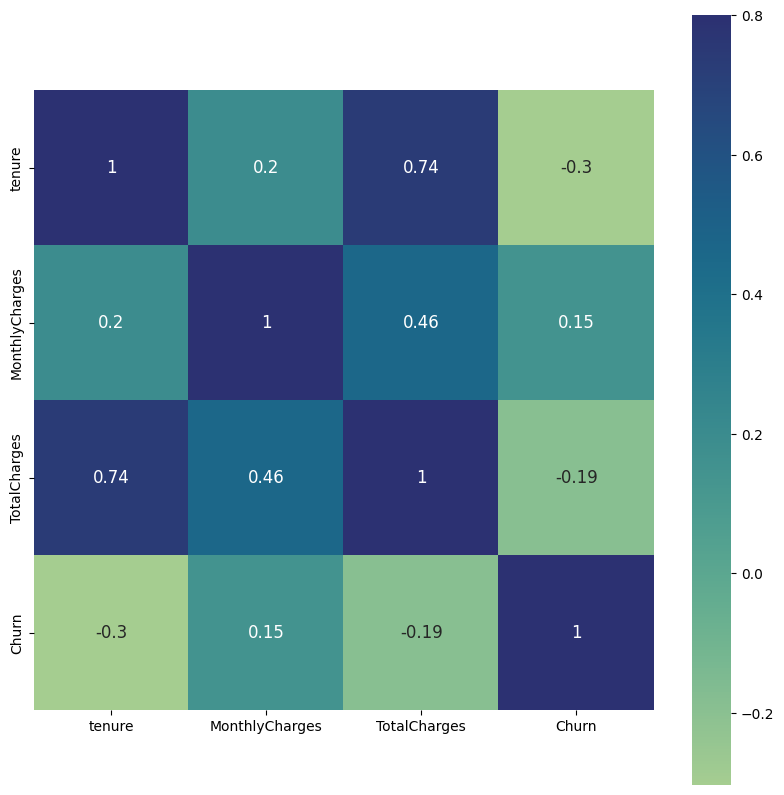

<Figure size 2000x1500 with 0 Axes>

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_eda.corr(method='kendall'), vmax=.8, square=True, annot=True, cmap='crest', annot_kws={"fontsize":12});

plt.figure(figsize=(20,15))
plt.show()

> Jika mengambil treshold paling minimum, 0.1, maka semua feature numerikal akan diambil sebagai selected feature.

## **V. IV. Finalizing The Feature**

- Memilih feature apa yang akan diencoding dengan ordinal, one-hot-encoder, dan scaling untuk mempermudah pengaturen pipeline.
- Membagi feature-feature sesuai dengan jenis scaling dan encoding yang yang akan diterapkan.

> Final Feature:

In [ ]:
df_eda_feature = df_eda.drop(columns='Churn', axis=1)
final_feature = df_eda_feature.columns
print(final_feature)
print('Total Kolom:', len(final_feature))

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')
Total Kolom: 17


> Menerapkan final feature ke seluruh dataset (train, test, dan validasi)

In [ ]:
x_train_final = x_train[final_feature]
x_val_final = x_val[final_feature]
x_test_final = x_test[final_feature]

print('X Train Total Kolom  :', len(x_train_final.columns))
print('X Val Total Kolom    :', len(x_train_final.columns))
print('X Test Total Kolom   :', len(x_train_final.columns))

X Train Total Kolom  : 17
X Val Total Kolom    : 17
X Test Total Kolom   : 17


# **VII. Data Preprocessing**

## **VI. I. Feature Encoding and Scaling**

> Feature yang akan diencode menggunakan one-hot-encoder:

> Disini akan diputuskan bahwa feature yang memiliki unique value lebih dari 3 akan diencode menggunakan one-hot-encoder. Hal ini dikarenakan feature-feature ini tidak memiliki order yang jelas karena hierarkinya bisa dibilang relatif. Sementara itu, feature yang memiliki unique value = 2 akan diencode menggunakan ordinal karena bersifat binary.

> Untuk scaling, akan digunakan standard scaler karena distribusi termasuk normal.

### **Target Scaling**

### **1. Kategorikal**

> Menentukan kolom yang akan menggunak One Hot Encoder. Kolom Kategorikal yang memiliki value lebih dari 2 akan menggunakan OHE. Hal ini karena hierarkinya bersifat relatif seghingga tidak bisa dilakukan secara ordinal. Sementara itu, kolom yang memiliki value = 2 akan diencode menggunakan ordinal encoder karena bersifat binary. Hal ini diterapkan untuk menghemat kolom sehingga tidak terlalu banyak.

In [ ]:
xy = df_eda_feature.select_dtypes(include=[object])
ohe_col = xy.loc[:, df.nunique() > 2]

print('Total Kolom OHE        : ',len(ohe_col.columns))
print(ohe_col.columns)

Total Kolom OHE        :  3
Index(['InternetService', 'Contract', 'PaymentMethod'], dtype='object')


> Menentukan kolom yang akan diencode secara ordinal:

In [ ]:
ode_col = xy.loc[:, df.nunique() < 3]
print(ode_col.columns)
print('\nSummary')
print('-'*20)
print('Total Kolom Kategorikal: ',len(xy.columns))
print('Total Kolom OHE        : ',len(ohe_col.columns))
print('Total Kolom ODE        : ',len(ode_col.columns))

Index(['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling'],
      dtype='object')

Summary
--------------------
Total Kolom Kategorikal:  14
Total Kolom OHE        :  3
Total Kolom ODE        :  11


### **2. Numerikal**

> Melakukan definisi kolom-kolom numerikal.

In [ ]:
scaler_col = df_eda_feature.select_dtypes(include=np.number)

In [ ]:
print('Total Kolom Numerikal:', len(scaler_col.columns))
scaler_col.columns

Total Kolom Numerikal: 3


Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

### **3. Designing The Pipeline**

#### **Numerikal**

> Kolom numerikal akan menggunakan standard scaler karena distribusi bersifat normal.

In [ ]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())])

# Applying the pipeline to x_train_final
num_tr = num_pipeline.fit_transform(x_train_final[scaler_col.columns])
num_tr

array([[ 0.89033689,  0.02313586,  0.55860468],
       [ 1.62276279, -1.48386939, -0.37443114],
       [ 1.33793049, -1.28658268, -0.26852564],
       ...,
       [ 1.46000148,  1.22011914,  2.13805661],
       [-0.90003753, -1.45900132, -0.91577982],
       [-1.26625048, -1.49381662, -0.98981663]])

#### **Kategorikal (OHE)**

Pipeline OHE:

In [ ]:
cat_pipeline_ohe = Pipeline([
        ('imputer_2', SimpleImputer(strategy='most_frequent')),
        ('ohe_enc', OneHotEncoder(sparse=False))])

# Applying the pipeline to x_train_final
cat_tr_ohe = cat_pipeline_ohe.fit_transform(x_train_final[ohe_col.columns])
cat_tr_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

#### **Kategorikal (Ordinal)**

> Pipeline Ordinal:

In [ ]:
cat_pipeline_ode = Pipeline([
        ('imputer_3', SimpleImputer(strategy='most_frequent')),
        ('ode_enc', OrdinalEncoder())])

# Applying the pipeline to x_train_final
cat_tr_ode = cat_pipeline_ode.fit_transform(x_train_final[ode_col.columns])
cat_tr_ode

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### **Transformer Pipeline**

> Pipeline column transformer:

In [ ]:
transformer_pipeline = ColumnTransformer([
        ("num", num_pipeline, scaler_col.columns),
        ("cat_ohe", cat_pipeline_ohe, ohe_col.columns),
        ("cat_ord", cat_pipeline_ode, ode_col.columns)])

train_tr = transformer_pipeline.fit_transform(x_train_final)

#### **Applying the Pipeline**

> Mengaplikasikan column transformer ke seluruh dataset (Train, Test, dan Validation)

> **Train Set**

In [ ]:
train_tr_frame = pd.DataFrame(train_tr)
train_tr_frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.890337,0.023136,0.558605,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.622763,-1.483869,-0.374431,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.337930,-1.286583,-0.268526,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.727576,0.164055,0.509313,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,-1.225560,0.701205,-0.923521,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4500,-1.022109,-0.449358,-0.842250,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4501,-0.208302,0.382894,-0.075042,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4502,1.460001,1.220119,2.138057,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
4503,-0.900038,-1.459001,-0.915780,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


> **Validation Set**

In [ ]:
val_tr = transformer_pipeline.transform(x_val_final)
val_tr_frame = pd.DataFrame(val_tr)
val_tr_frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1.622763,0.762547,1.852407,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.622763,0.497287,1.564707,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,-0.940728,0.790730,-0.650575,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,-1.225560,0.203844,-0.941429,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.582072,1.312960,2.250336,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,-1.144180,-0.480857,-0.919309,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1123,1.622763,-1.311451,-0.182756,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1124,-1.144180,0.792388,-0.834928,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1125,0.320672,0.512208,0.399283,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


> **Test Set**

In [ ]:
test_tr = transformer_pipeline.transform(x_test_final)
test_tr_frame = pd.DataFrame(test_tr)
test_tr_frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-1.184870,0.338131,-0.897188,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.035840,0.338131,0.083706,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.337930,0.933307,1.634178,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,-1.022109,0.341447,-0.784379,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.378621,-0.210624,0.682485,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,-0.330373,1.312960,0.101945,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1404,-0.818657,0.474077,-0.611693,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1405,-0.655896,-0.346569,-0.606290,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1406,-0.330373,0.162397,-0.286478,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


## **VII. II. Data Balancing**

> Melakukan data balancing menggunakan SMOTENC karena didominasi feature bersifat kategorikal, dan target juga merupakan kategorikal.

In [ ]:
smnc = SMOTENC(categorical_features=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], sampling_strategy='minority', random_state=420)

In [ ]:
x_train_res, y_train_res = smnc.fit_resample(train_tr, y_train)

In [ ]:
x_train_res_frame = pd.DataFrame(x_train_res)
x_train_res_frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.890337,0.023136,0.558605,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.622763,-1.483869,-0.374431,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.337930,-1.286583,-0.268526,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.727576,0.164055,0.509313,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,-1.225560,0.701205,-0.923521,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6613,-0.197391,-0.901209,-0.548118,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6614,-1.205576,0.337690,-0.919220,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6615,0.198601,1.094975,0.597097,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
6616,-1.133012,-1.357130,-0.953156,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# **VIII. Model Definition**

> **Creating Pipeline**

> Membuat pipeline untuk memudahkan training model

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_tr, y_train))
train_dataset = train_dataset.shuffle(buffer_size=3500).batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((val_tr, y_val))
val_dataset = val_dataset.batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((test_tr, y_test))
test_dataset = test_dataset.batch(32)

> Tahapan berlanjut ke model ANN Sequential

## **VIII. I. Sequential**

- Neuron input sebanyak 17 dan 11
- Menggunakan activation 'relu` di hidden layer.
- Menggunakan activation 'sigmoid' di output layer.
- Menggunakan optimizer Adam 0.001 learning rate
- Dihitung berdasarkan score accuracy model.

In [ ]:
# Neuron Input
n_neuron_seq1 = (17, 11)

# Arsitektur Model
n_feature = x_train_res.shape[1]

# Model Type
model_seq1 = Sequential()

# Input Layer
model_seq1.add(Input(shape=(n_feature, )))


# Hidden Layer
for n in n_neuron_seq1:  
    model_seq1.add(Dense(n, activation='relu'))
  

# Output Layer
model_seq1.add(Dense(1, activation='sigmoid'))

# Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001) 

# Compiling
model_seq1.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [ ]:
model_seq1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 17)                425       
                                                                 
 dense_16 (Dense)            (None, 11)                198       
                                                                 
 dense_17 (Dense)            (None, 1)                 12        
                                                                 
Total params: 635
Trainable params: 635
Non-trainable params: 0
_________________________________________________________________


## **VIII. II. Functional**

- Neuron input sebanyak 20, 10 dan 5
- Menggunakan activation 'relu` di hidden layer.
- Menggunakan activation 'sigmoid' di output layer.
- Menggunakan optimizer Adam 0.001 learning rate
- Dihitung berdasarkan score accuracy model.

In [ ]:
# Jumlah Neuron
n_neuron_func1 = (20, 10, 5)

# Arsitektur Model

# Input Layer
data_in = Input(shape=(n_feature, ))
hidden_n = data_in

# Hidden Layer
for n in n_neuron_func1:
    hidden_n = Dense(9, activation='relu')(hidden_n)
  
    
# Output Layer
data_out = Dense(1, activation='sigmoid')(hidden_n) 

# Model Function
model_func1 = Model(inputs=data_in, outputs=data_out)

# Compiling
model_func1.compile(
    loss='binary_crossentropy',
    optimizer=opt, 
    metrics=['accuracy']
)

In [ ]:
model_func1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense_18 (Dense)            (None, 9)                 225       
                                                                 
 dense_19 (Dense)            (None, 9)                 90        
                                                                 
 dense_20 (Dense)            (None, 9)                 90        
                                                                 
 dense_21 (Dense)            (None, 1)                 10        
                                                                 
Total params: 415
Trainable params: 415
Non-trainable params: 0
_________________________________________________________________


# **IX. Model Training**

> Berlanjut ke training model:
- batch size sebanyak 32
- epich sebanyak 30

## **Sequential**

In [ ]:
history=model_seq1.fit(train_tr, y_train, 
                      validation_data=(val_tr,y_val), 
                      batch_size = 32, epochs = 30,
                      )

Epoch 1/30
141/141 [==============================] - 1s 4ms/step - loss: 0.5246 - accuracy: 0.7472 - val_loss: 0.4298 - val_accuracy: 0.7879
Epoch 2/30
141/141 [==============================] - 0s 3ms/step - loss: 0.4428 - accuracy: 0.7882 - val_loss: 0.4045 - val_accuracy: 0.8057
Epoch 3/30
141/141 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.7936 - val_loss: 0.3990 - val_accuracy: 0.8039
Epoch 4/30
141/141 [==============================] - 0s 3ms/step - loss: 0.4275 - accuracy: 0.7960 - val_loss: 0.3984 - val_accuracy: 0.8057
Epoch 5/30
141/141 [==============================] - 0s 3ms/step - loss: 0.4246 - accuracy: 0.7993 - val_loss: 0.3950 - val_accuracy: 0.8146
Epoch 6/30
141/141 [==============================] - 0s 3ms/step - loss: 0.4230 - accuracy: 0.8011 - val_loss: 0.3961 - val_accuracy: 0.8057
Epoch 7/30
141/141 [==============================] - 0s 3ms/step - loss: 0.4209 - accuracy: 0.7989 - val_loss: 0.3976 - val_accuracy: 0.8075
Epoch 

In [ ]:
clear_session()

## **Functional**

In [ ]:
history2=model_func1.fit(train_tr, y_train, validation_data=(val_tr,y_val), batch_size = 32, epochs = 30)

Epoch 1/30
141/141 [==============================] - 1s 4ms/step - loss: 0.4752 - accuracy: 0.7516 - val_loss: 0.4068 - val_accuracy: 0.7995
Epoch 2/30
141/141 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.7927 - val_loss: 0.4039 - val_accuracy: 0.8004
Epoch 3/30
141/141 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.7945 - val_loss: 0.4006 - val_accuracy: 0.8048
Epoch 4/30
141/141 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.7964 - val_loss: 0.4019 - val_accuracy: 0.8039
Epoch 5/30
141/141 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.8024 - val_loss: 0.3981 - val_accuracy: 0.8075
Epoch 6/30
141/141 [==============================] - 0s 3ms/step - loss: 0.4245 - accuracy: 0.7991 - val_loss: 0.3980 - val_accuracy: 0.8066
Epoch 7/30
141/141 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.8040 - val_loss: 0.4008 - val_accuracy: 0.8066
Epoch 

> Setelah model training

# **X. Model Evaluation**

## **Sequential**

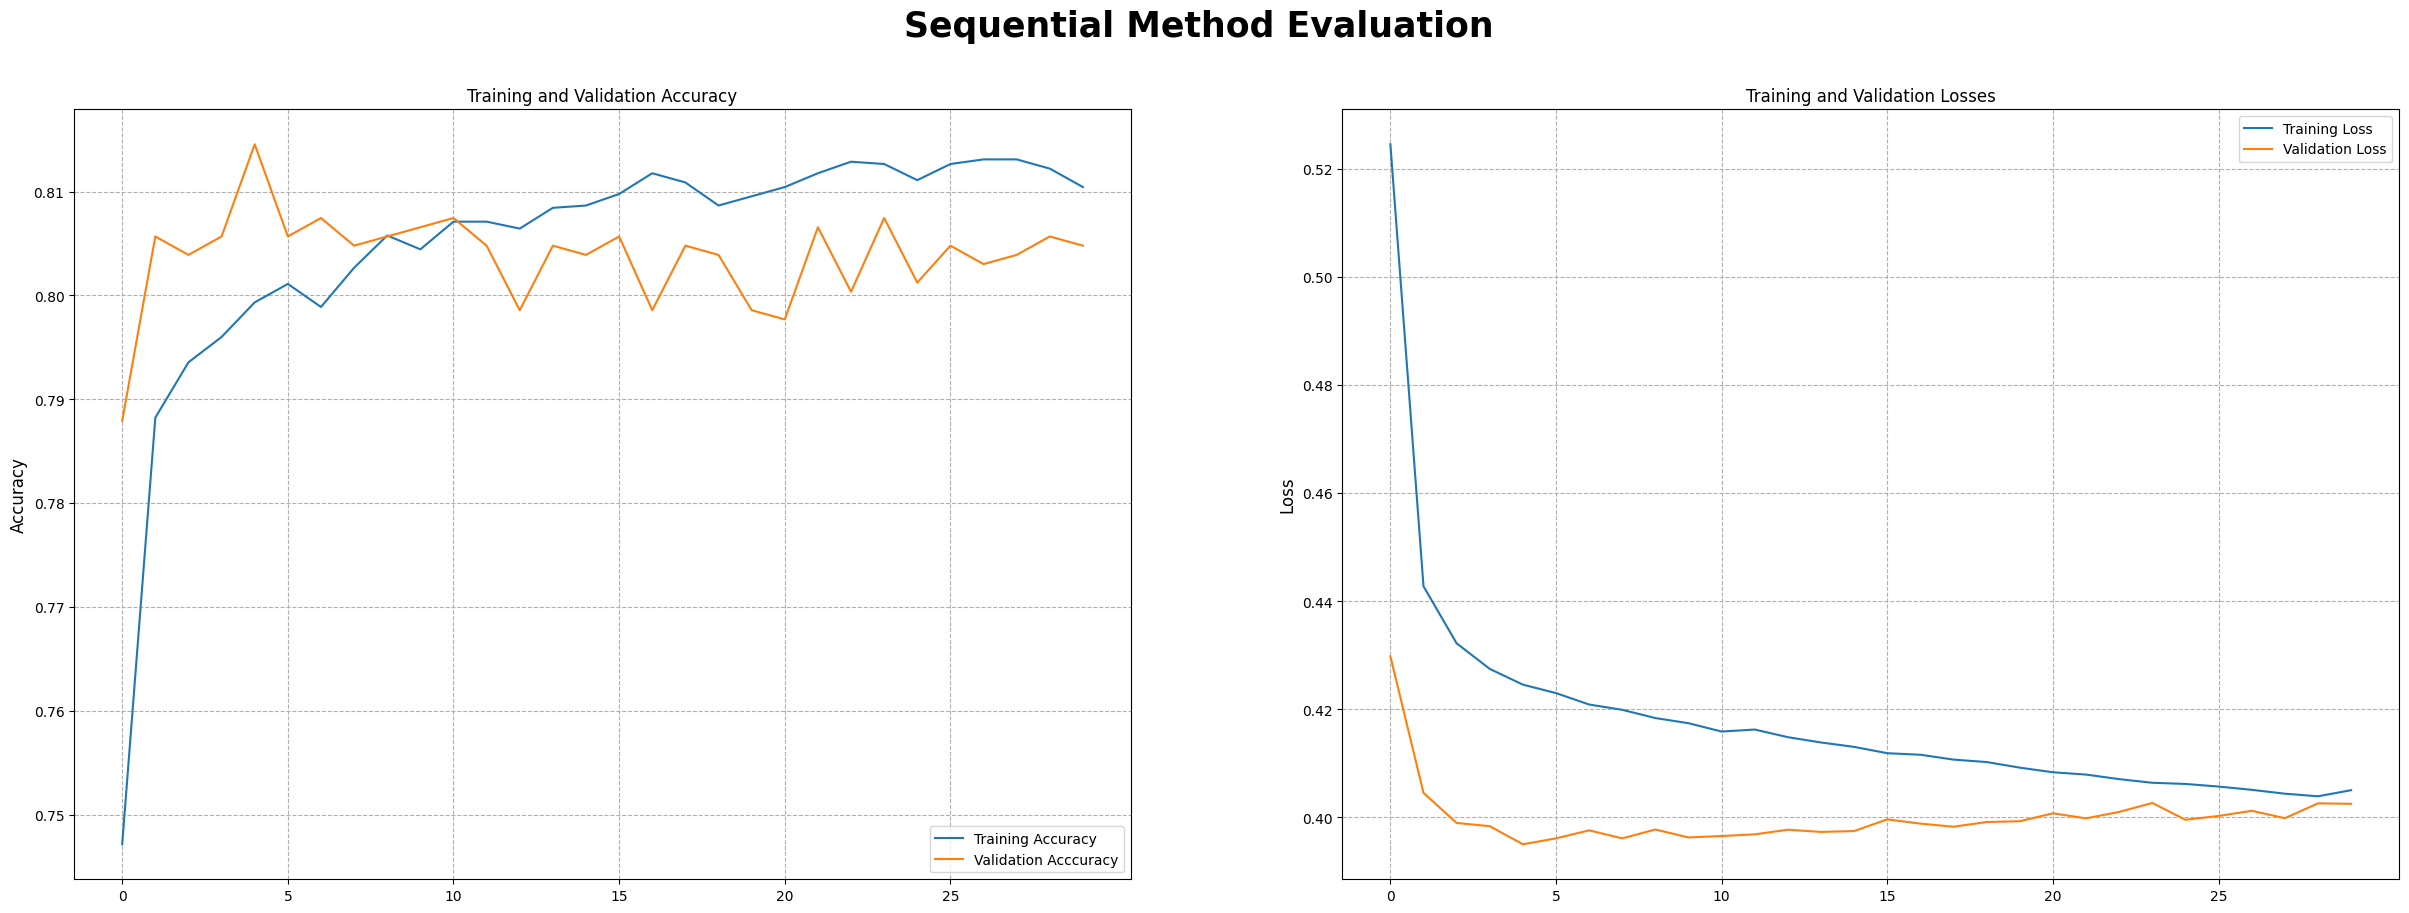

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(np.arange(0,30,5))
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.xticks(np.arange(0,30,5))
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

- Dari evaluasi, model mengalami gradien explosion. Epoh yang terlihat ideal ada pada epoch 10.
- Model mulai overfit saat melewati epoch 10.
Sementara dari segi loss, model di epoch 10 masih bersifat overfit.


> **Confusion Matrix**

44/44 [==============================] - 0s 1ms/step


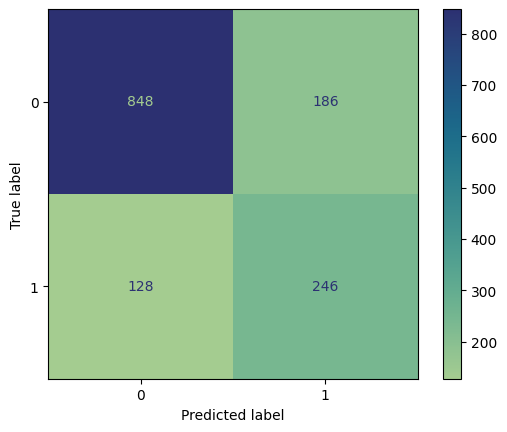

In [ ]:
y_pred_seq1 = model_seq1.predict(test_tr)
y_pred_seq1 = (y_pred_seq1 > 0.4)

cf_matrix = confusion_matrix(y_test, y_pred_seq1)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot(cmap='crest')
plt.show()
# sns.heatmap(cf_matrix, annot = True, annot_kws = {'size':15}, fmt='g');

In [ ]:
print(classification_report(y_pred_seq1,y_test))

              precision    recall  f1-score   support

       False       0.82      0.87      0.84       976
        True       0.66      0.57      0.61       432

    accuracy                           0.78      1408
   macro avg       0.74      0.72      0.73      1408
weighted avg       0.77      0.78      0.77      1408



Model menunjukkan akurasi yang cukup bagus, yaitu 78%, hanya saja nilai recall True masih relatif kecil (57%).

Note: Nilai recall true difokuskan karena model ini tidak ingin memprediksi orang yang aslinya memiliki resiko churn diprediksi aman. Model ini ingin memfokuskan ke orang yang aslinya tidak beresiko churn tapi diprediksi beresiko (false negative)

> **AUC Score**

In [ ]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_seq1)
auc = roc_auc_score(y_test,y_pred_seq1)
auc

0.7389350324268973

Dari AUC score, model sudah cukup bisa membedakan target 0 dan 1 karena cukup mendekati 1 (73%)

## **Functional**

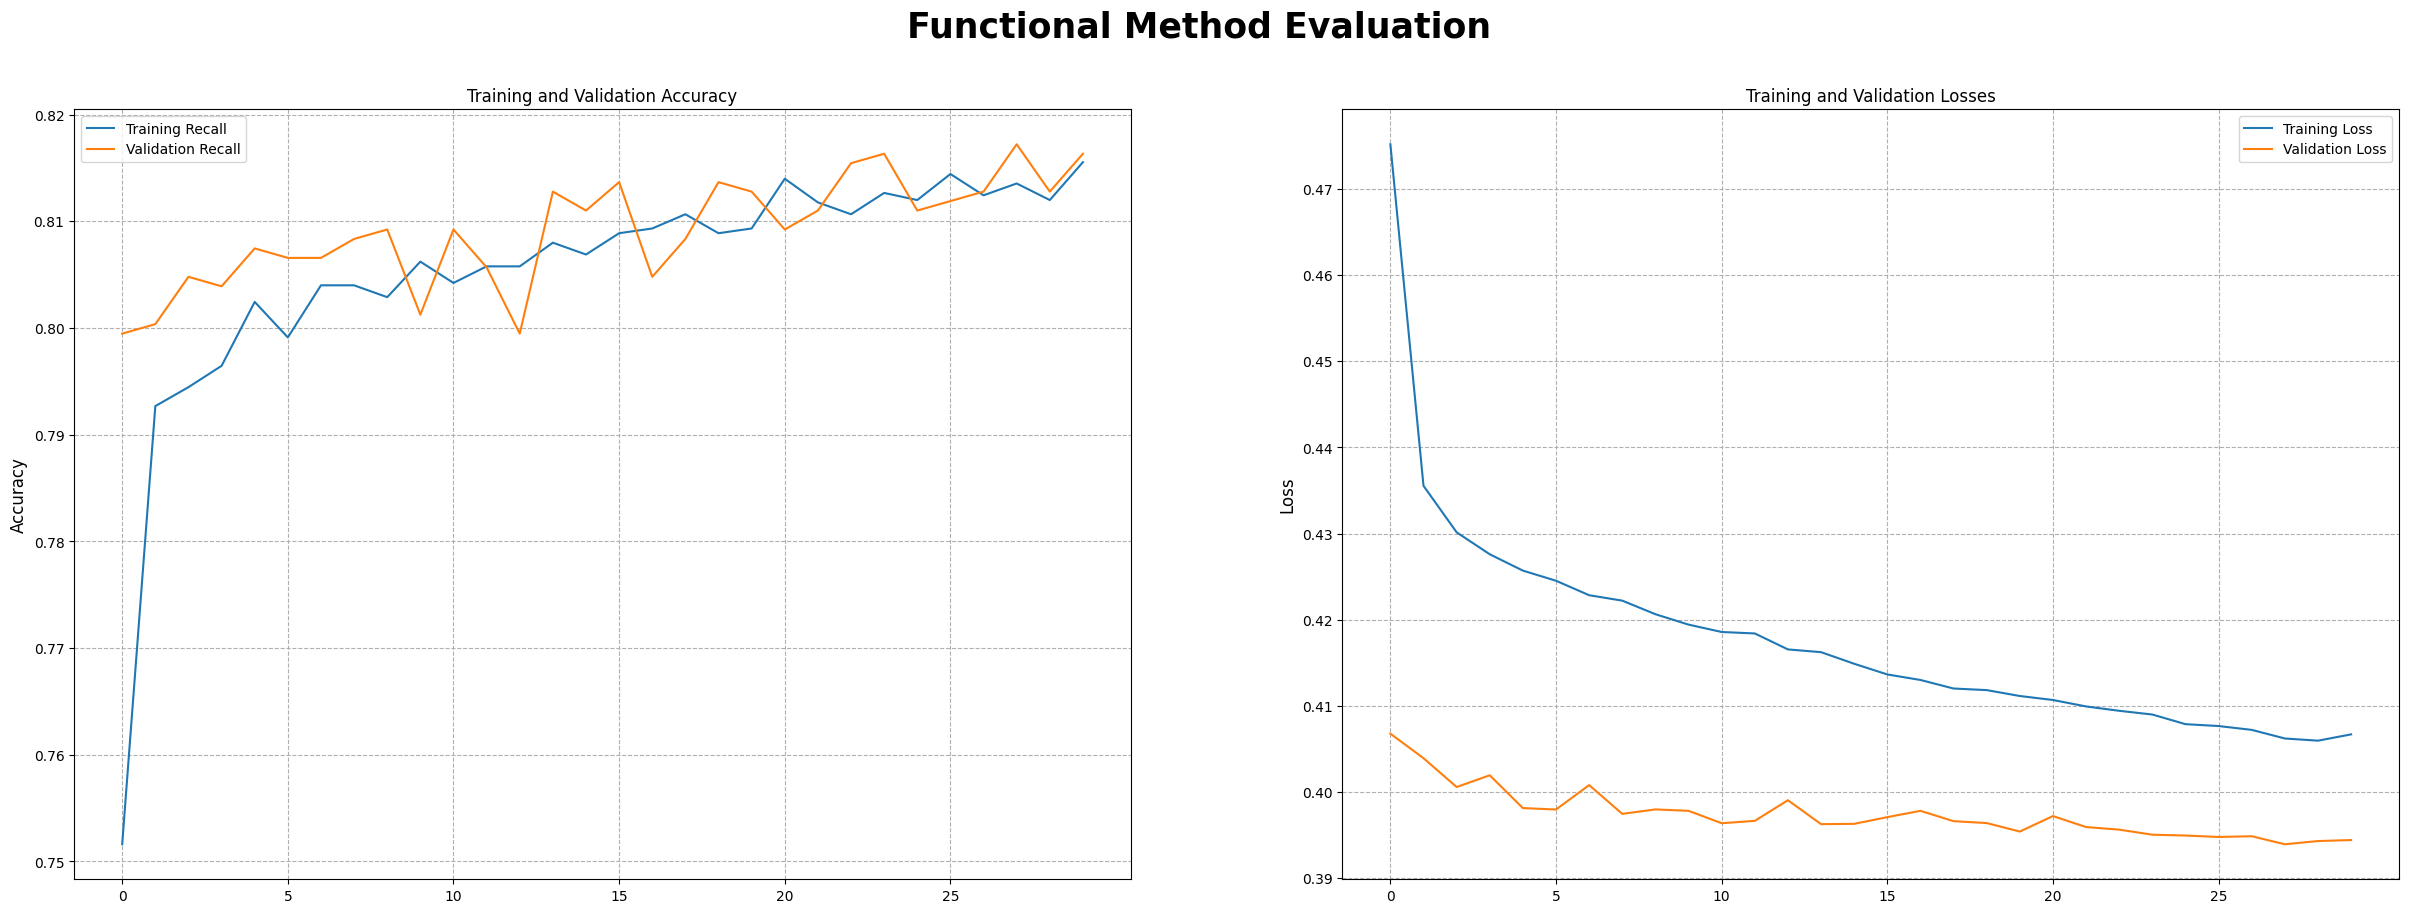

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history2.history['accuracy'],label="Training Recall")
plt.plot(history2.history['val_accuracy'], label="Validation Recall")
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(np.arange(0,30,5))
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history2.history['loss'], label="Training Loss")
plt.plot(history2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.xticks(np.arange(0,30,5))
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

- Dari model functional, model juga mengalami gradien explosion. meski begitu, rentang score accuracynya masih tidak terlalu jauh, masih berkisar 0.80-0.82.
- Dari segi loss, model bersifat underfit.


44/44 [==============================] - 0s 1ms/step


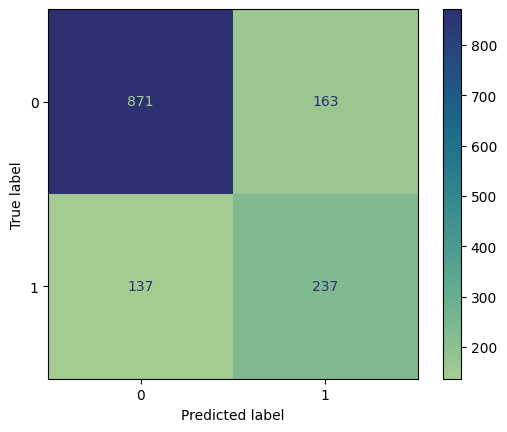

In [ ]:
y_pred_func1 = model_func1.predict(test_tr)
y_pred_func1 = (y_pred_func1 > 0.4)

cf_matrix = confusion_matrix(y_test, y_pred_func1)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot(cmap='crest')
plt.show()
# sns.heatmap(cf_matrix, annot = True, annot_kws = {'size':15}, fmt='g');

In [ ]:
print(classification_report(y_pred_func1,y_test))

              precision    recall  f1-score   support

       False       0.84      0.86      0.85      1008
        True       0.63      0.59      0.61       400

    accuracy                           0.79      1408
   macro avg       0.74      0.73      0.73      1408
weighted avg       0.78      0.79      0.78      1408



- Model cukup bagus dari segi accuracy (79%)
- Dari segi recall score true, model functional lebih baik dari model sequential.

> **AUC Score**

In [ ]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_seq1)
auc = roc_auc_score(y_test,y_pred_seq1)
auc

0.7389350324268973

# **XI. Model Improvement**

## **Sequential**

> Dalam melakukan improvement, parameter yang ditambahkan yaitu:
- activation relu
- kernel initializer = HeNormal
- kernel regulizer = l2
- menambahkan normalisasi per layer
- activasi sigmoid di output layer
- menggunakan optimizer RMSProp dengan clipvalue 0.005 (karena ada gradient explosion)

In [ ]:
model_seq2 = tf.keras.models.Sequential()
model_seq2.add(tf.keras.layers.Dense(train_tr_frame.shape[1], activation='relu', input_shape=(train_tr_frame.shape[1],),kernel_initializer='HeNormal',kernel_regularizer='l2')) #input layer
model_seq2.add(tf.keras.layers.BatchNormalization())
model_seq2.add(tf.keras.layers.Dense(8, activation='relu')) #hidden layer
model_seq2.add(tf.keras.layers.BatchNormalization())
model_seq2.add(tf.keras.layers.Dropout(0.1))
model_seq2.add(tf.keras.layers.Dense(1, activation='sigmoid')) #output layer

In [ ]:
(int(len(train_tr_frame)))/(19*(train_tr_frame.shape[1]+1))

9.48421052631579

In [ ]:
model_seq2.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(clipvalue=0.005),metrics='accuracy')

In [ ]:
history3=model_seq2.fit(train_tr, y_train, 
                      validation_data=(val_tr,y_val), 
                      batch_size = 32, epochs = 30,
                      )

Epoch 1/30
141/141 [==============================] - 3s 5ms/step - loss: 0.9522 - accuracy: 0.7072 - val_loss: 0.7923 - val_accuracy: 0.7853
Epoch 2/30
141/141 [==============================] - 0s 3ms/step - loss: 0.7320 - accuracy: 0.7822 - val_loss: 0.6321 - val_accuracy: 0.8075
Epoch 3/30
141/141 [==============================] - 0s 3ms/step - loss: 0.6380 - accuracy: 0.7938 - val_loss: 0.5589 - val_accuracy: 0.8110
Epoch 4/30
141/141 [==============================] - 0s 3ms/step - loss: 0.5820 - accuracy: 0.7949 - val_loss: 0.5156 - val_accuracy: 0.8181
Epoch 5/30
141/141 [==============================] - 0s 3ms/step - loss: 0.5525 - accuracy: 0.7971 - val_loss: 0.4881 - val_accuracy: 0.8172
Epoch 6/30
141/141 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7951 - val_loss: 0.4678 - val_accuracy: 0.8172
Epoch 7/30
141/141 [==============================] - 0s 3ms/step - loss: 0.5078 - accuracy: 0.7996 - val_loss: 0.4547 - val_accuracy: 0.8172
Epoch 

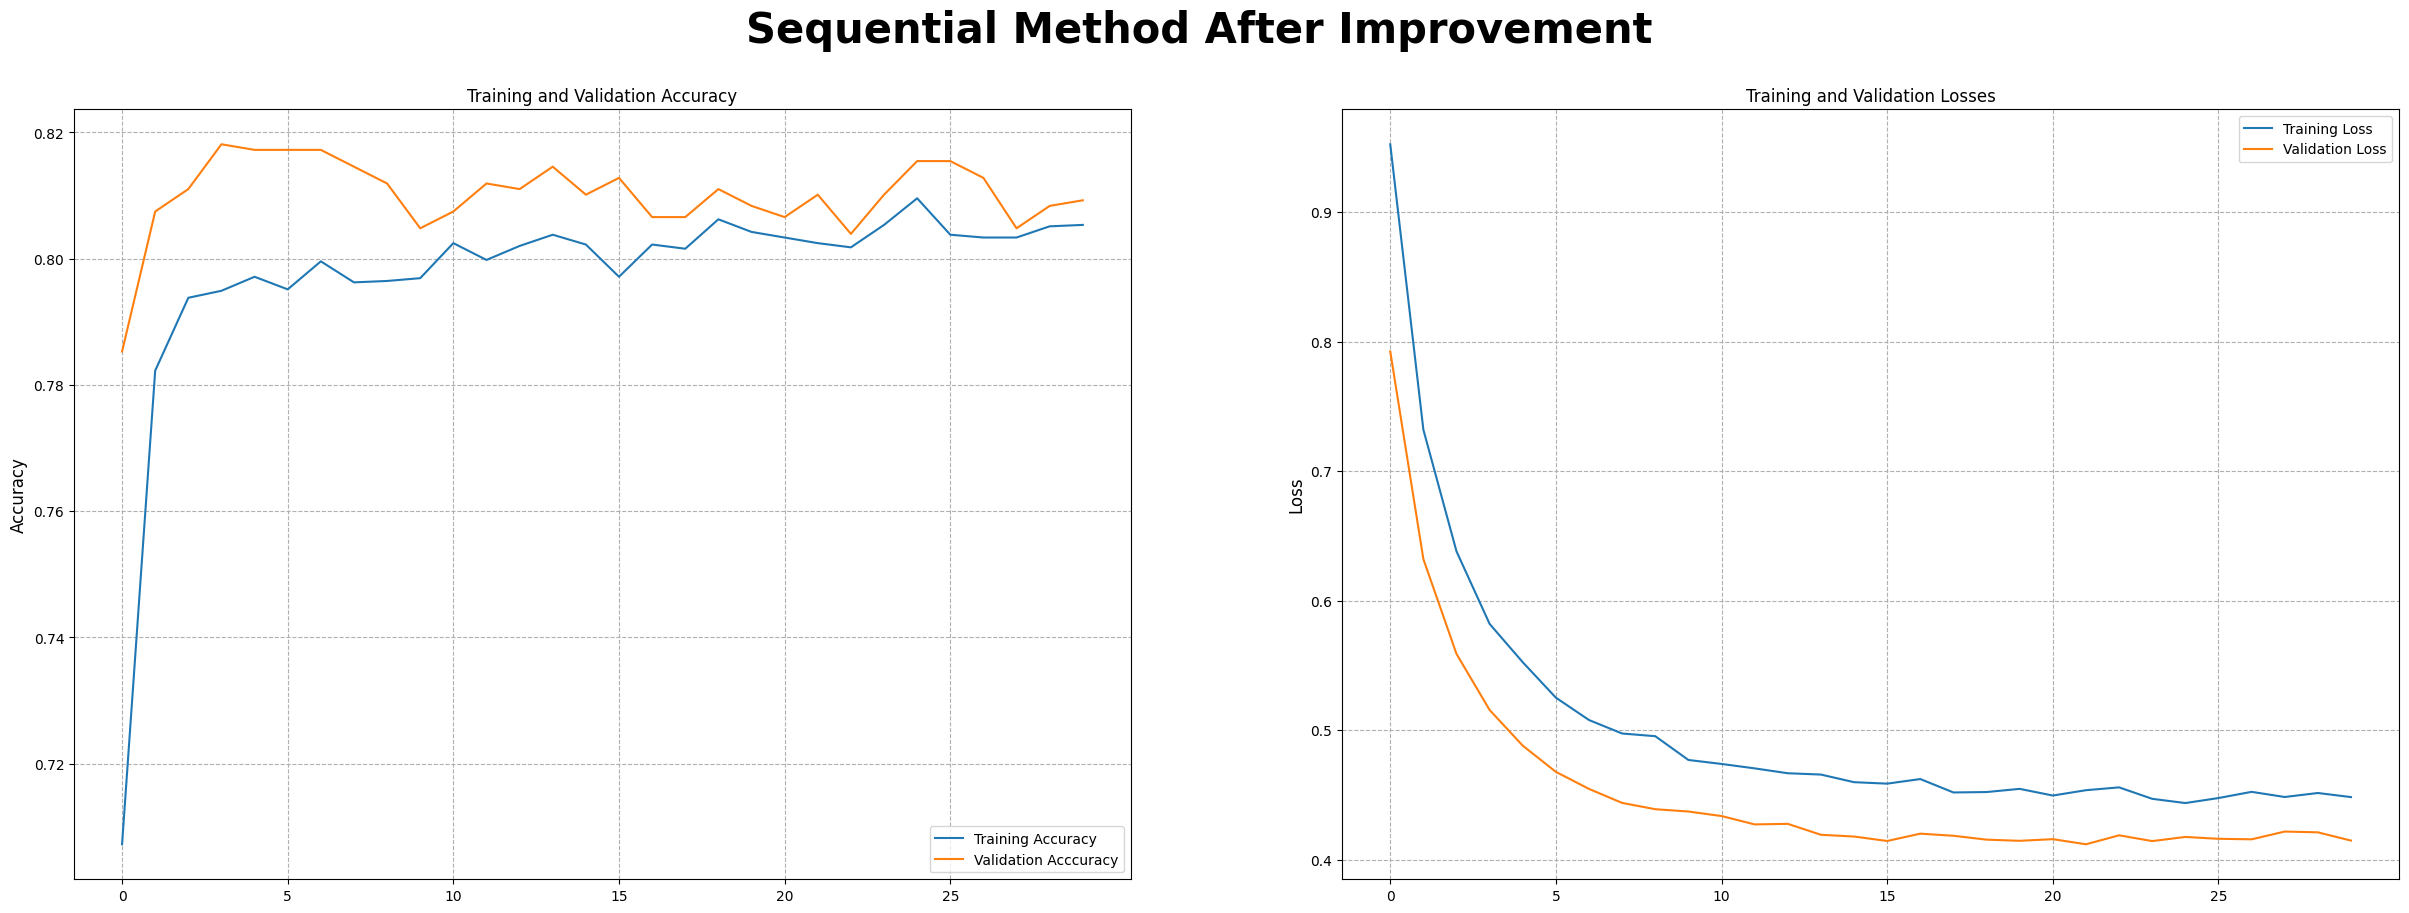

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method After Improvement', fontsize=30, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history3.history['accuracy'],label="Training Accuracy")
plt.plot(history3.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(np.arange(0,30,5))
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history3.history['loss'], label="Training Loss")
plt.plot(history3.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.xticks(np.arange(0,30,5))
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

- Dari segi accuracy, model sedikit improve dari sebelumnya. Hanya saja, model sedikit underfit, tapi masih bisa ditoleransi.
- Dari segi loss, model juga masih underfit. Tapi model ini sudah bisa dikatakan lebih baik dari model sequential sebelumnya

44/44 [==============================] - 0s 2ms/step


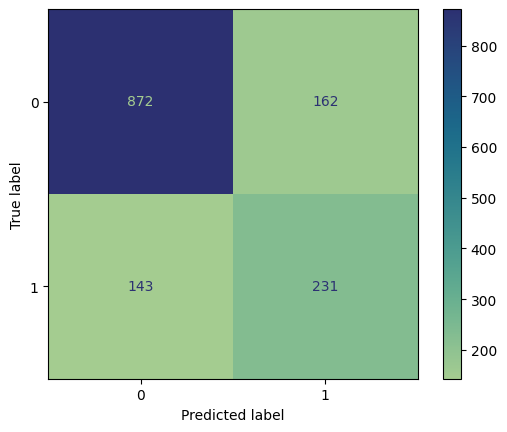

In [ ]:
y_pred_seq2 = model_seq2.predict(test_tr)
y_pred_seq2 = (y_pred_seq2 > 0.4)

cf_matrix = confusion_matrix(y_test, y_pred_seq2)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot(cmap='crest')
plt.show()
# sns.heatmap(cf_matrix, annot = True, annot_kws = {'size':15}, fmt='g');

In [ ]:
print(classification_report(y_pred_seq2,y_test))

              precision    recall  f1-score   support

       False       0.84      0.86      0.85      1015
        True       0.62      0.59      0.60       393

    accuracy                           0.78      1408
   macro avg       0.73      0.72      0.73      1408
weighted avg       0.78      0.78      0.78      1408



Dari classification report, malah model ini memiliki accuracy yang jauh lebih turun dibandingkan dengan model sebelumnya dalam melakukan prediksi ke test dataset

berlanjut ke model functional:

## **Functional**

In [ ]:
# Jumlah Neuron
n_neuron_func1 = (20, 10, 5)

# Arsitektur Model

# Input Layer
data_in = Input(shape=(n_feature, ))
hidden_n = data_in

# Hidden Layer
for n in n_neuron_func1:
    hidden_n = Dense(n, activation='relu')(hidden_n)
    
# Output Layer
data_out = Dense(1, activation='relu')(hidden_n) 

# Model Function
model_func2 = Model(inputs=data_in, outputs=data_out)

# Compiling
opt2 = tf.keras.optimizers.Adamax(clipvalue=0.005) 
model_func2.compile(
    loss='binary_crossentropy',
    optimizer=opt2, 
    metrics=['accuracy']
)

In [ ]:
history4=model_func2.fit(train_tr, y_train, 
                      validation_data=(val_tr,y_val), 
                      batch_size = 32, epochs = 30,
                      )

Epoch 1/30
141/141 [==============================] - 1s 4ms/step - loss: 1.1521 - accuracy: 0.7760 - val_loss: 0.7634 - val_accuracy: 0.8048
Epoch 2/30
141/141 [==============================] - 0s 2ms/step - loss: 0.9263 - accuracy: 0.7907 - val_loss: 0.8091 - val_accuracy: 0.8083
Epoch 3/30
141/141 [==============================] - 0s 3ms/step - loss: 0.9324 - accuracy: 0.7962 - val_loss: 0.7554 - val_accuracy: 0.8083
Epoch 4/30
141/141 [==============================] - 0s 3ms/step - loss: 0.9421 - accuracy: 0.7984 - val_loss: 0.8504 - val_accuracy: 0.8146
Epoch 5/30
141/141 [==============================] - 0s 3ms/step - loss: 0.9827 - accuracy: 0.8002 - val_loss: 0.8499 - val_accuracy: 0.8154
Epoch 6/30
141/141 [==============================] - 0s 3ms/step - loss: 1.0435 - accuracy: 0.7998 - val_loss: 0.8427 - val_accuracy: 0.8172
Epoch 7/30
141/141 [==============================] - 0s 3ms/step - loss: 1.0271 - accuracy: 0.8020 - val_loss: 0.9327 - val_accuracy: 0.8101
Epoch 

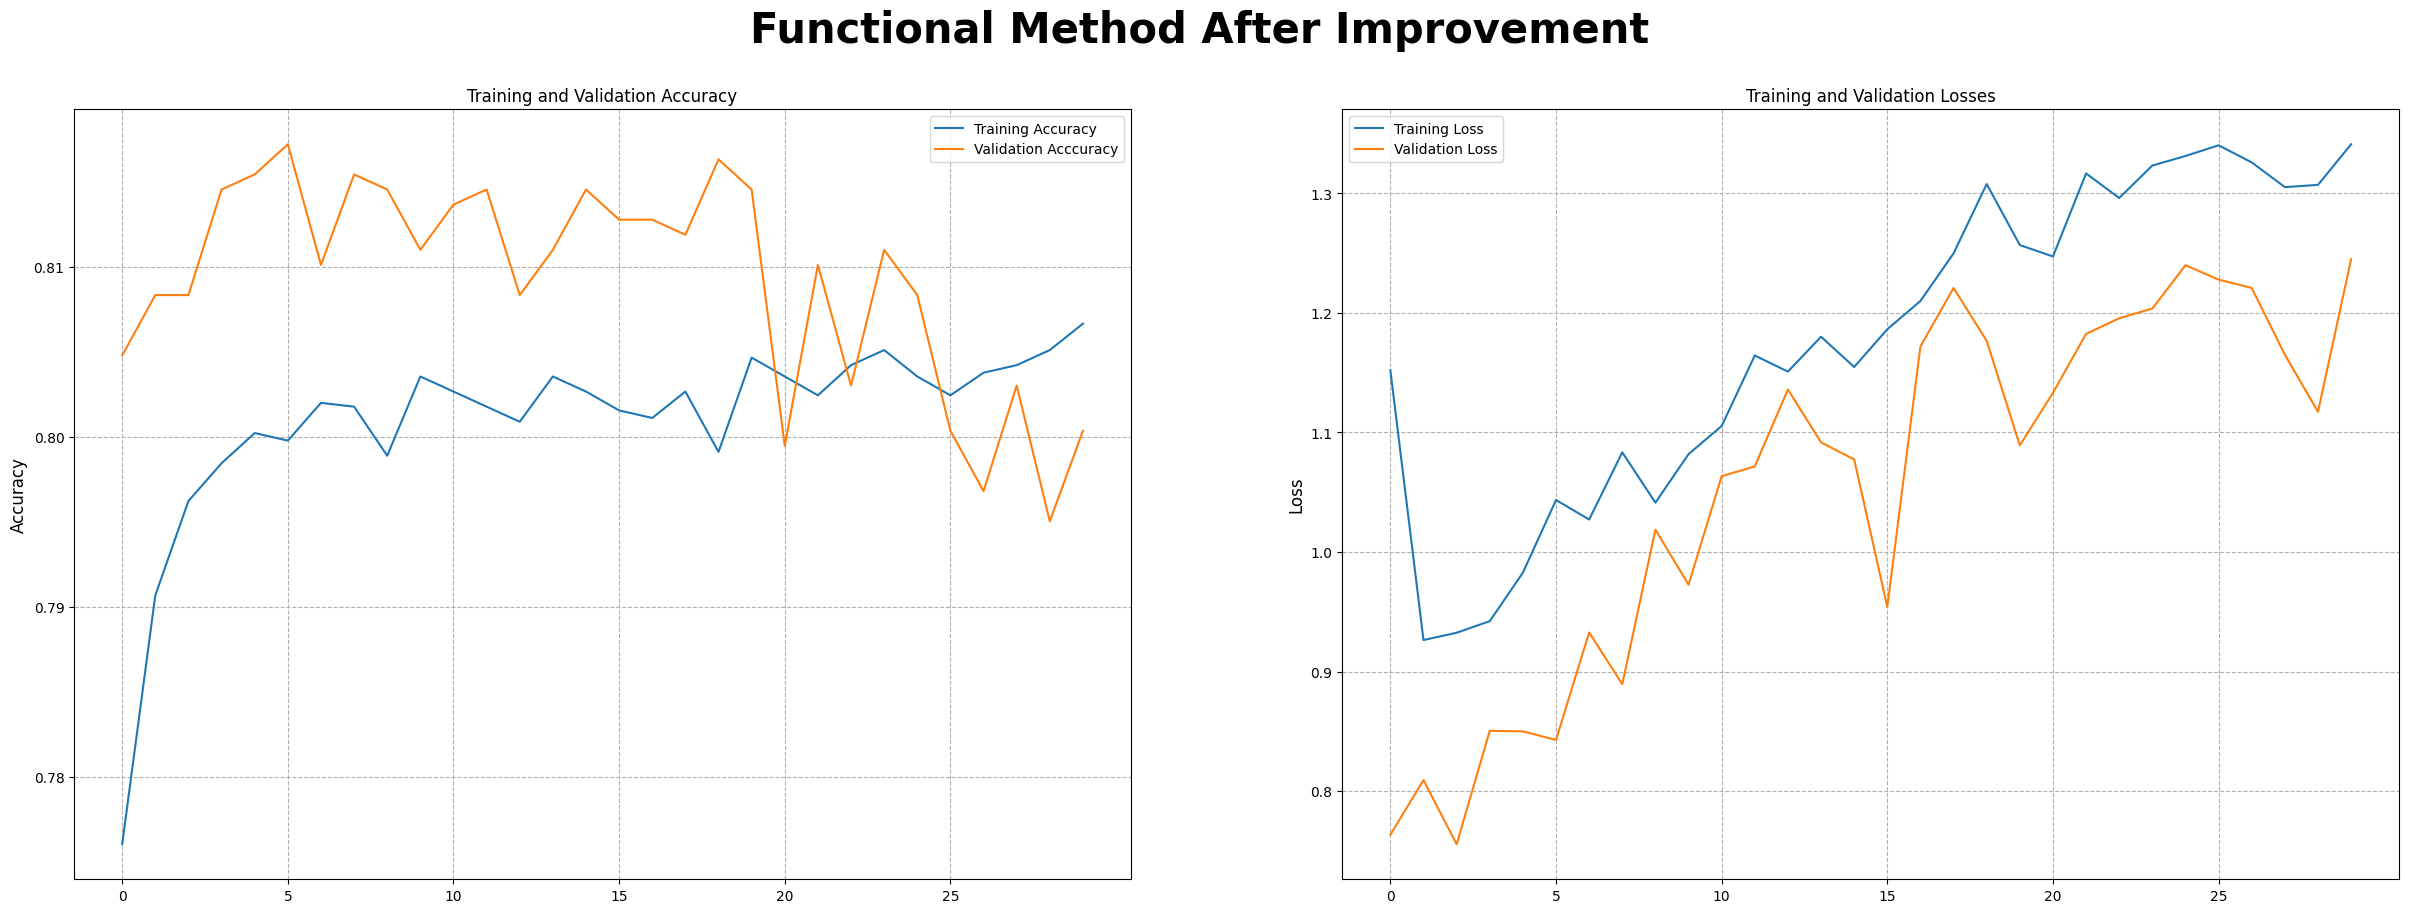

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional Method After Improvement', fontsize=30, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history4.history['accuracy'],label="Training Accuracy")
plt.plot(history4.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(np.arange(0,30,5))
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history4.history['loss'], label="Training Loss")
plt.plot(history4.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.xticks(np.arange(0,30,5))
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

- Functional model 2 memiliki gradient explosion yang sangat buruk meskipun sudah ditambahkan clip value. Model sebelumnya jauh lebih stabil.

44/44 [==============================] - 0s 1ms/step


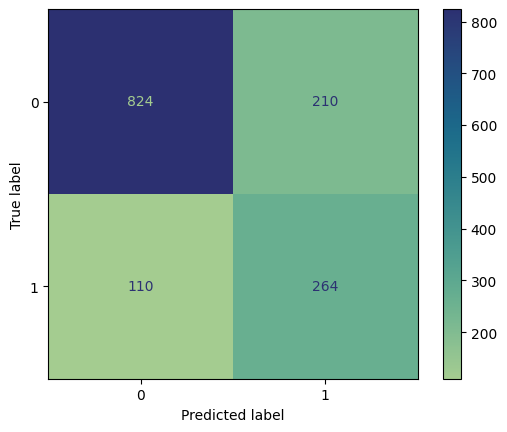

In [ ]:
y_pred_func2 = model_func2.predict(test_tr)
y_pred_func2 = (y_pred_func2 > 0.4)

cf_matrix = confusion_matrix(y_test, y_pred_func2)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot(cmap='crest')
plt.show()
# sns.heatmap(cf_matrix, annot = True, annot_kws = {'size':15}, fmt='g');

Kesimpulan tiap model berdasarkan classification report:

In [ ]:
print('-'*20,'SEQUENTIAL VER 1','-'*20)
print(' '*15,'Adam Learning Rate: 0.001',' '*15)
print(classification_report(y_pred_seq1,y_test))
print(' ')
print('-'*20,'SEQUENTIAL VER 2','-'*20)
print('RMSProp Optimizer, Clipvalue = 0.005, With Normalization')
print(' '*15,'L2 Regularizer, 8 Hidden Layer',' '*15)
print(classification_report(y_pred_seq2,y_test))
print(' ')
print('-'*20,'FUNCTIONAL VER 1','-'*20)
print(' '*15,'Adam Learning Rate: 0.001',' '*15)
print(classification_report(y_pred_func1,y_test))
print(' ')
print('-'*20,'FUNCTIONAL VER 2','-'*20)
print(' '*2,'Sigmoid Activation, With Normalizer, Adamax Optimizer')
print(classification_report(y_pred_func2,y_test))

-------------------- SEQUENTIAL VER 1 --------------------
                Adam Learning Rate: 0.001                
              precision    recall  f1-score   support

       False       0.82      0.87      0.84       976
        True       0.66      0.57      0.61       432

    accuracy                           0.78      1408
   macro avg       0.74      0.72      0.73      1408
weighted avg       0.77      0.78      0.77      1408

 
-------------------- SEQUENTIAL VER 2 --------------------
RMSProp Optimizer, Clipvalue = 0.005, With Normalization
                L2 Regularizer, 8 Hidden Layer                
              precision    recall  f1-score   support

       False       0.84      0.86      0.85      1015
        True       0.62      0.59      0.60       393

    accuracy                           0.78      1408
   macro avg       0.73      0.72      0.73      1408
weighted avg       0.78      0.78      0.78      1408

 
-------------------- FUNCTIONAL VER 1 --------

Dari segi accuracy dan recall, model functional ver 1 lebih menunjukkan performa yang baik. Model ini akan dipilih untuk deployment.

# **XII. Model Deployment**

In [ ]:
!mkdir deployment

mkdir: cannot create directory ‘deployment’: File exists


In [ ]:
# with open("/content/drive/MyDrive/DTS Resources/DTS/deployment/pipeline.pkl", "wb") as f:
#     pickle.dump(preproc_pipeline, f)
with open("pipeline.pkl", "wb") as f:
    pickle.dump(transformer_pipeline, f)

In [ ]:
model_func1.save('model.h5')

# **XIII. Model Inference**

In [ ]:
    new_data = {
    'SeniorCitizen': args.get('SeniorCitizen'),
    'Partner': args.get('Partner'),
    'Dependents': args.get('Dependents'),
    'tenure': args.get('tenure'),
    'MultipleLines': args.get('MultipleLines'),
    'InternetService': args.get('InternetService'),
    'OnlineSecurity': args.get('OnlineSecurity'),
    'OnlineBackup': args.get('OnlineBackup'),
    'DeviceProtection': args.get('DeviceProtection'),
    'TechSupport': args.get('TechSupport'),
    'StreamingTV': args.get('StreamingTV'),
    'StreamingMovies': args.get('StreamingMovies'),
    'Contract': args.get('Contract'),
    'PaperlessBilling': args.get('PaperlessBilling'),
    'PaymentMethod': args.get('PaymentMethod'),
    'MonthlyCharges': args.get('MonthlyCharges'),
    'TotalCharges': args.get('TotalCharges')}

In [ ]:
import pandas as pd
new_data = {
  'SeniorCitizen': 'Yes',
  'Partner': 'No',
  'Dependents': 'No',
  'tenure': 54,
  'MultipleLines': 'No',
  'InternetService': 'DSL',
  'OnlineSecurity': 'No',
  'OnlineBackup': 'No',
  'DeviceProtection': 'Yes',
  'TechSupport': 'Yes',
  'StreamingTV': 'No',
  'StreamingMovies': 'Yes',
  'Contract': 'One year',
  'PaperlessBilling': 'No',
  'PaymentMethod': 'Bank transfer (automatic)',
  'MonthlyCharges': 62.25,
  'TotalCharges': 3259.95}

new_data = pd.DataFrame([new_data])
new_data


,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Yes,No,No,54,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic),62.25,3259.95


In [ ]:
inference = transformer_pipeline.transform(new_data)

In [ ]:
inference_frame = pd.DataFrame(inference)
inference_frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.890337,-0.076336,0.439511,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
inference_pred = model_func1.predict(inference)
inference_pred = np.where(inference_pred >= 0.5,1,0)

1/1 [==============================] - 0s 22ms/step


In [ ]:
new_data['Churn'] = inference_pred
new_data

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,54,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic),62.25,3259.95,0


# **XIV. Kesimpulan**

Didapatkan model terbaik dengan kriteria sebagai berikut:

In [ ]:
model_func1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense_18 (Dense)            (None, 9)                 225       
                                                                 
 dense_19 (Dense)            (None, 9)                 90        
                                                                 
 dense_20 (Dense)            (None, 9)                 90        
                                                                 
 dense_21 (Dense)            (None, 1)                 10        
                                                                 
Total params: 415
Trainable params: 415
Non-trainable params: 0
_________________________________________________________________


- Neuron input sebanyak 20, 10 dan 5
- Menggunakan activation 'relu` di hidden layer.
- Menggunakan activation 'sigmoid' di output layer.
- Menggunakan optimizer Adam 0.001 learning rate.

Note:
- Untuk memprediksi churn, model sudah bisa dikatakan relatif baik jika difokuskan ke score accuracy. 
- Berdasarkan recall score, model masih harus dilakukan improvement karena skor recall positif (jika positif = Churn rate positive) masih relatif rendah (56%).
- Improvement dapat dilakukan dengan cara sebagai berikut:
  - mengecek selected feature dengan parameter leain seperti ANOVA f-Test
  - mengecek parameter lain pada model function untuk menemukan parameter terbaik.
  - mencoba optimizer lain dengan parameter yang berbeda-beda.
  - target model selanjutnya setidaknya nilai recall (>60%)